<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/9week_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

• 출력 Label : train_data의 첫번째 열(column)\
• train_data를 8:2의 비율로 학습데이터와 검증(Validation)데이터로 분리


In [133]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

x = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (33600, 784)
y_train: (33600,)
x_val: (8400, 784)
y_val: (8400,)


In [134]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. Image 샘플 시각화


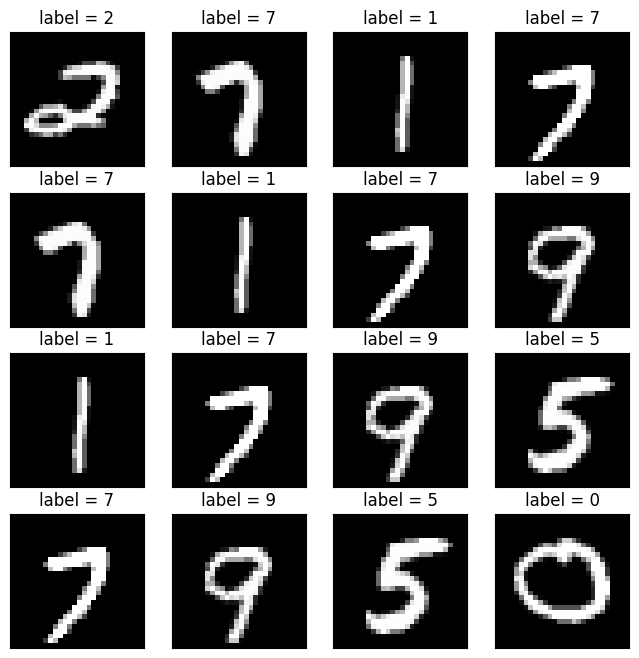

In [136]:
fig, ax = plt.subplots(4, 4, figsize=(8,8))
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(x_train.iloc[i*4+j*4].values.reshape(28,28), cmap = 'gray')
    ax[i, j].set_title('label = %s' % (y_train.iloc[i*4 + j*4]))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

2. Scikit-learn 을 이용해서 모델을 학습


In [137]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True,
                         intercept_scaling = 1, l1_ratio = None, max_iter = 100,
                         multi_class = 'multinomial', n_jobs = None, penalty = 'l2',
                         random_state = None, solver = 'lbfgs', tol = 0.001, verbose = 0,
                         warm_start = False)

In [138]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

3. 검증(Validation)데이터(x_val)를 prediction 하고 정확도를 평가


In [140]:
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.916


4. 옳게 분류한 이미지를 아래 format 에 맞게 시각화

Correctly predicted images:


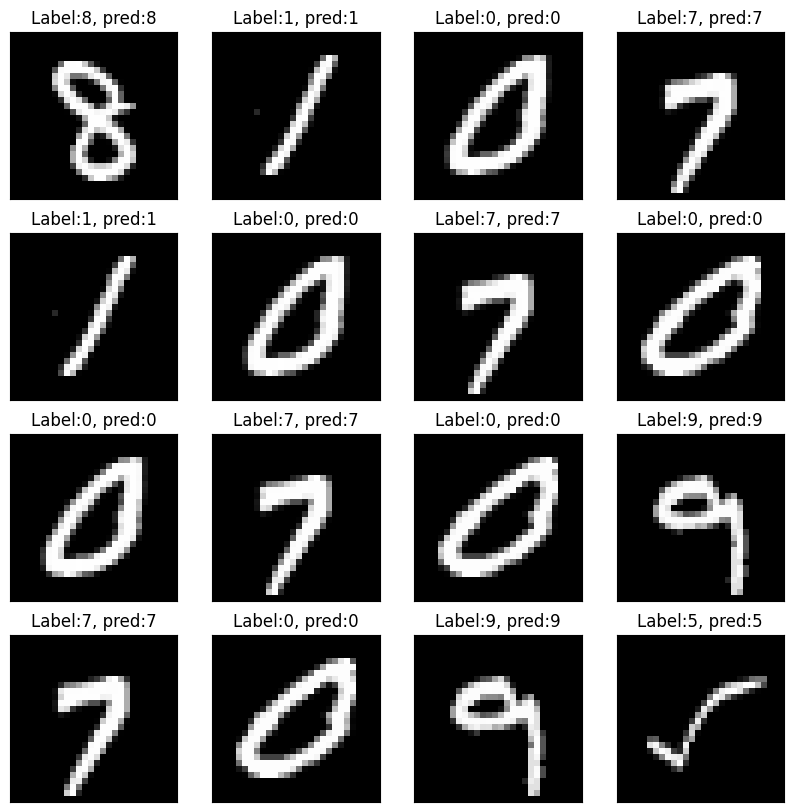

In [141]:
print("Correctly predicted images:")
x_val_correct = x_val[(y_val == y_val_pred).values]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(x_val_correct.iloc[i*4+j*4].values.reshape(28,28), cmap = 'gray')
    ax[i, j].set_title('Label:{}, pred:{}'.format(y_val_correct.iloc[i*4 + j*4], y_val_pred_correct[i*4 + j*4]))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

5. 잘못 분류한 이미지를 아래 format 에 맞게 시각화

Incorrectly predicted images:


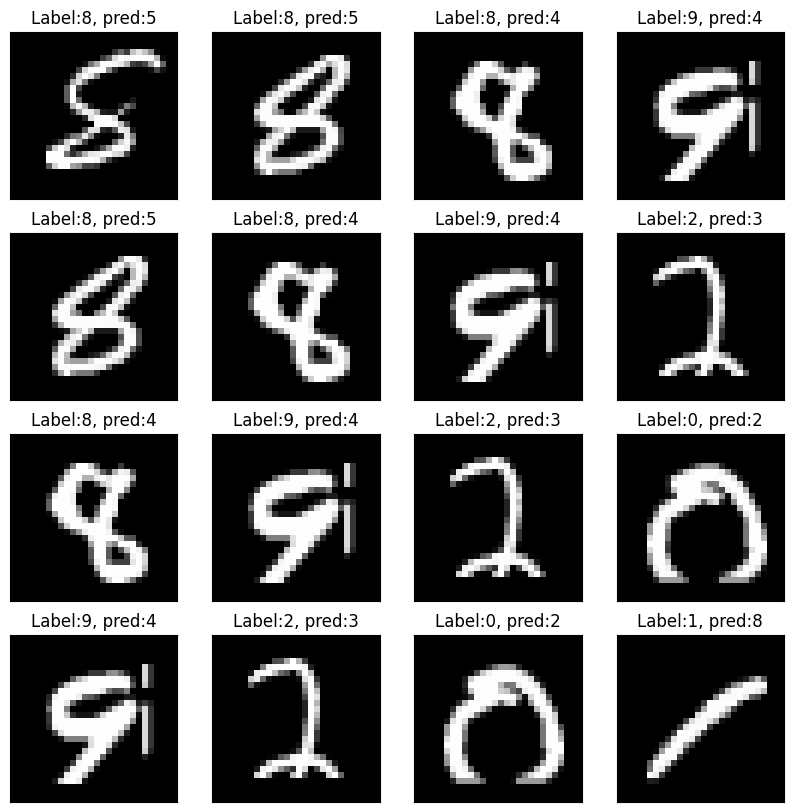

In [142]:
print("Incorrectly predicted images:")
x_val_incorrect = x_val[(y_val != y_val_pred).values]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(10,10))
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(x_val_incorrect.iloc[i*4+j*4].values.reshape(28,28), cmap = 'gray')
    ax[i, j].set_title('Label:{}, pred:{}'.format(y_val_incorrect.iloc[i*4 + j*4], y_val_pred_incorrect[i*4 + j*4]))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

6. 테스트 데이터(x_test)를 사용해서 예측하기


In [143]:
x_test = test_data[x_train.columns]
preds = clf.predict(x_test)

In [144]:
print(preds)

[2 0 9 ... 3 9 2]


7. 예측값을 파일(sample_submission.csv)로 내보내기

In [145]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
sample_submission['Label'] = preds
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv', index = False)

In [146]:
print(sample_submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      7
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
